# Predicción del brote de coronavirus y la tasa de recuperación con Facebook Prophet.
* Son muchos los factores que influyen, por lo tanto, la predicción puede estar equivocada.
  * Se utilizan menos datos.
  * Cabe señalar que la presencia de un tratamiento efectivo y una vacuna puede influir en la predicción.

## Instalación de Facebook Prophet.
* pip install fbprophet

Si tiene problemas con la instalación de fbprophet, desde Anaconda prompt utilice:
* conda install -c conda-forge fbprophet

Si al correr el script le muestra : *Importing plotly failed. Interactive plots will not work.* utilice:
* pip install python-tools

## Fuente de datos
* https://github.com/CSSEGISandData/COVID-19
* https://facebook.github.io/prophet/docs/installation.html#python


In [1]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
recovered_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
death_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

In [2]:
def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns = {"variable":"Date","value":case_type}, inplace=True)
    return melted_df
def merge_data(confirm_df, recovered_df, deaths_df):
    new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
    return new_df

In [3]:
# Load EDA pkg
import pandas as pd

In [4]:
confirm_df = get_n_melt_data(confirmed_cases_url, "Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url, "Recovered")
deaths_df = get_n_melt_data(death_cases_url, "Deaths")

In [5]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
26329,Aruba,Netherlands,12.5186,-70.0358,3/18/20,4
26330,NaN,Zambia,-15.4167,28.2833,3/18/20,2
26331,NaN,Djibouti,11.8251,42.5903,3/18/20,1
26332,NaN,"Gambia, The",13.4432,-15.3101,3/18/20,1
26333,Montserrat,United Kingdom,16.7425,-62.1874,3/18/20,1


In [6]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [8]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
26329,Aruba,Netherlands,12.5186,-70.0358,3/18/20,4,0,0
26330,NaN,Zambia,-15.4167,28.2833,3/18/20,2,0,0
26331,NaN,Djibouti,11.8251,42.5903,3/18/20,1,0,0
26332,NaN,"Gambia, The",13.4432,-15.3101,3/18/20,1,0,0
26333,Montserrat,United Kingdom,16.7425,-62.1874,3/18/20,1,0,0


In [9]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [10]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [11]:
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171


In [12]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,57.000000,57.000000,57.000000
mean,70894.456140,26690.105263,2341.438596
std,52451.938644,27795.733584,2098.762816
min,555.000000,28.000000,17.000000
25%,27635.000000,1124.000000,564.000000
50%,75639.000000,16121.000000,2122.000000
75%,95120.000000,51170.000000,3254.000000
max,214910.000000,83207.000000,8733.000000


In [13]:
df_per_day.plot(kind = 'line', figsize = (20,5))

In [14]:
# Time Series Forecasting
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [15]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [16]:
# Model Initialize
from fbprophet import Prophet
model = Prophet()

In [17]:
model.add_seasonality(name="monthly", period = 30.5, fourier_order = 5)

In [18]:
# Split Dataset
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171


In [19]:
global_cases = df_per_day.reset_index()

In [20]:
global_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/22/20,555,28,17
1,1/23/20,653,30,18
2,1/24/20,941,36,26
3,1/25/20,1434,39,42
4,1/26/20,2118,52,56


In [21]:
confirmed_cases = global_cases[['Date', 'Confirmed']]
recovered_cases = global_cases[['Date', 'Recovered']]

In [22]:
confirmed_cases.shape

(57, 2)

In [23]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

C:\Users\jose0\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [24]:
train = confirmed_cases[:40]
test = confirmed_cases[40:]

In [25]:
train.head()

,ds,y
0,1/22/20,555
1,1/23/20,653
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [26]:
# Fit Model
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# Future Date
future_dates = model.make_future_dataframe(periods = 15)

In [28]:
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [29]:
# Prediction
prediction = model.predict(future_dates)

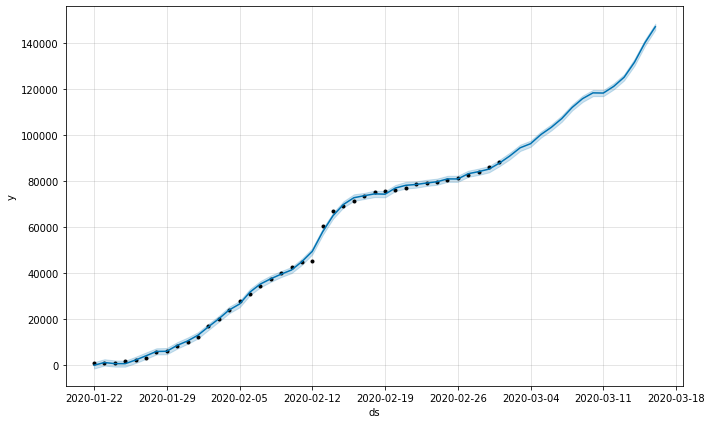

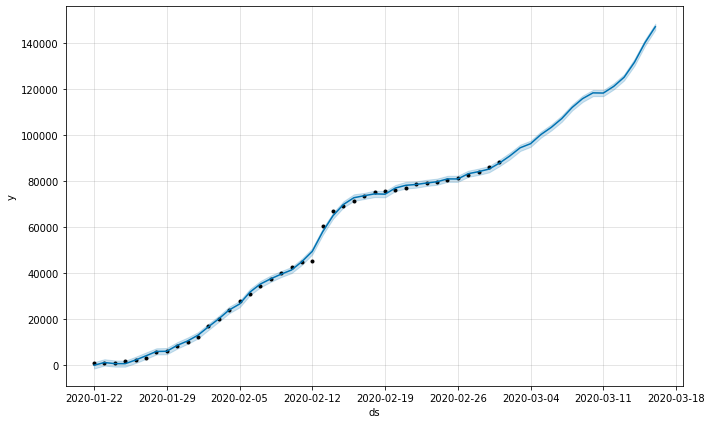

In [30]:
# Plot Prediction
model.plot(prediction)

**Puntos negros** = Datos reales     **Linea azul** = Datos pronosticados

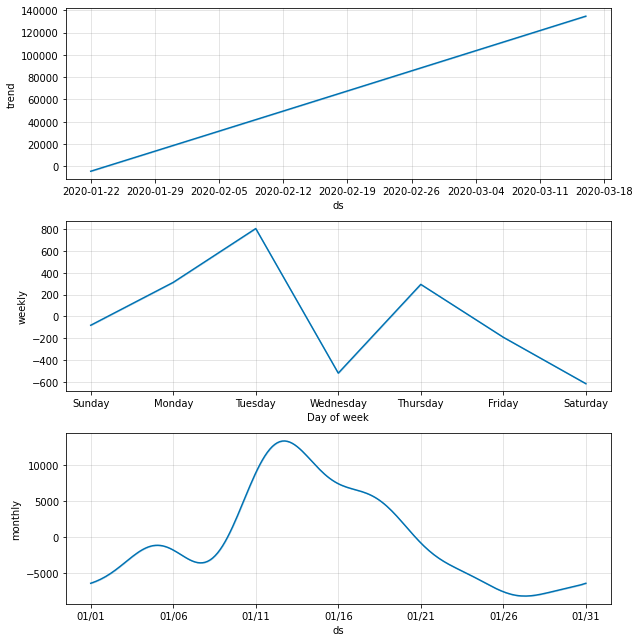

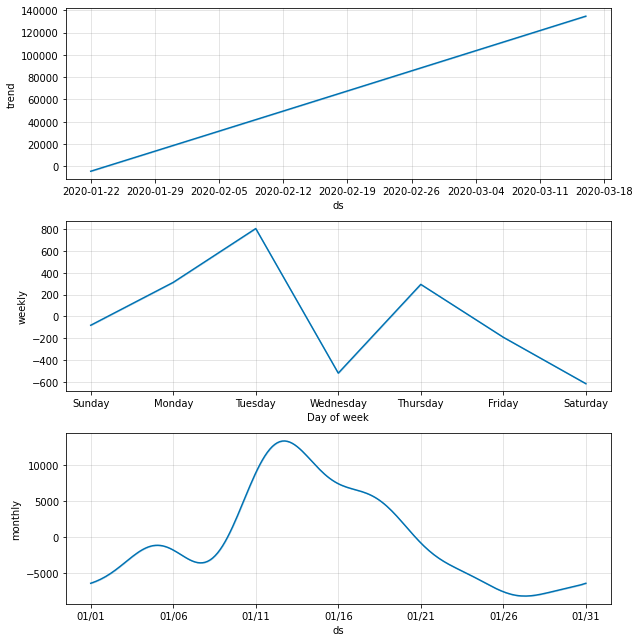

In [31]:
model.plot_components(prediction)

In [32]:
test

,ds,y
40,3/10/20,118592
41,3/11/20,125865
42,3/12/20,128343
43,3/13/20,145193
44,3/14/20,156094
45,3/15/20,167446
46,3/16/20,181527
47,3/17/20,197142
48,3/18/20,214910
49,3/2/20,90306


In [33]:
test['dates'] = pd.to_datetime(test['ds'])

C:\Users\jose0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
test

,ds,y,dates
40,3/10/20,118592,2020-03-10
41,3/11/20,125865,2020-03-11
42,3/12/20,128343,2020-03-12
43,3/13/20,145193,2020-03-13
44,3/14/20,156094,2020-03-14
45,3/15/20,167446,2020-03-15
46,3/16/20,181527,2020-03-16
47,3/17/20,197142,2020-03-17
48,3/18/20,214910,2020-03-18
49,3/2/20,90306,2020-03-02


In [35]:
test = test.set_index("dates")

In [36]:
test = test['y']

In [37]:
import matplotlib.pyplot as plt

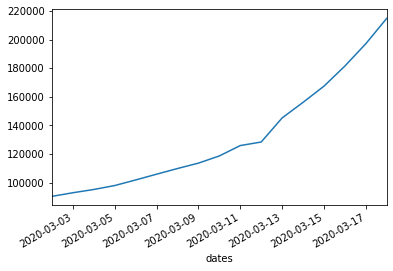

In [38]:
test.plot()

In [39]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

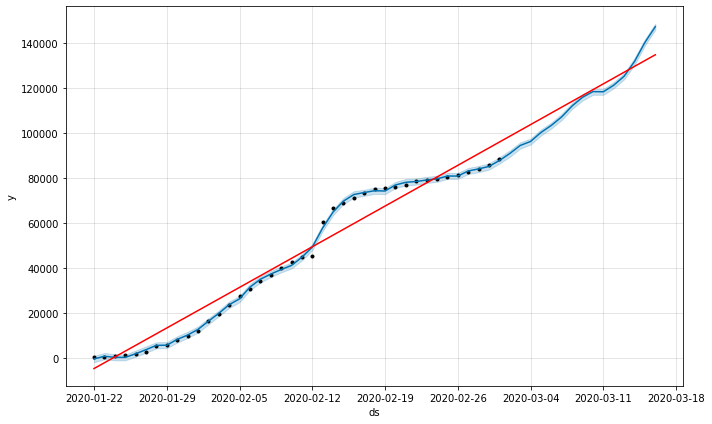

In [40]:
fig = model.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),model,prediction)